In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
'''
from google.colab import files

uploaded = files.upload()
'''

Saving BINANCE_BTCUSDT, 1D.csv to BINANCE_BTCUSDT, 1D (1).csv


In [68]:
data = pd.read_csv('BINANCE_BTCUSDT, 1D.csv', date_parser = True)
len(data)

1615

In [69]:
data_training = data[data['time']< '2021-09-01'].copy()
len(data_training)

1476

In [70]:
data_test = data[data['time']> '2021-09-01'].copy()
len(data_test)


139

In [6]:
data_test.head()

,time,open,high,low,close
1476,2021-09-01T00:00:00Z,47100.89,49156.00,46512.00,48810.52
1477,2021-09-02T00:00:00Z,48810.51,50450.13,48584.06,49246.64
1478,2021-09-03T00:00:00Z,49246.63,51000.00,48316.84,49999.14
1479,2021-09-04T00:00:00Z,49998.00,50535.69,49370.00,49915.64
1480,2021-09-05T00:00:00Z,49917.54,51900.00,49450.00,51756.88


In [76]:
 training_data = data_training.drop(['time'], axis = 1)
 training_data.head()

,open,high,low,close
0,4261.48,4485.39,4200.74,4285.08
1,4285.08,4371.52,3938.77,4108.37
2,4108.37,4184.69,3850.00,4139.98
3,4120.98,4211.08,4032.62,4086.29
4,4069.13,4119.62,3911.79,4016.00


In [77]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01777651, 0.01963201, 0.0233728 , 0.0181509 ],
       [0.01816732, 0.01778279, 0.01894786, 0.01522456],
       [0.01524103, 0.01474873, 0.01744844, 0.01574803],
       ...,
       [0.75690695, 0.7528037 , 0.75917673, 0.75479126],
       [0.7547954 , 0.74072689, 0.74381366, 0.72523274],
       [0.72523722, 0.73029288, 0.74122933, 0.72718651]])

In [78]:
scaler.scale_

array([1.65598556e-05, 1.62396979e-05, 1.68910359e-05, 1.65601353e-05])

In [10]:
X_train = [] 
Y_train = []
for i in range(60, training_data.shape[0]):
    
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i])
X_train, Y_train = np.array(X_train), np.array(Y_train)

    

In [11]:
training_data.shape

(1476, 4)

In [12]:
X_train.shape

(1416, 60, 4)

In [13]:
Y_train.shape

(1416, 4)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =4))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11000     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.1)


Epoch 1/50
20/20 [==============================] - 3s 174ms/step - loss: 0.0290 - val_loss: 0.1331
Epoch 2/50
20/20 [==============================] - 3s 142ms/step - loss: 0.0102 - val_loss: 0.0256
Epoch 3/50
20/20 [==============================] - 3s 142ms/step - loss: 0.0066 - val_loss: 0.0171
Epoch 4/50
20/20 [==============================] - 3s 142ms/step - loss: 0.0045 - val_loss: 0.0115
Epoch 5/50
20/20 [==============================] - 3s 143ms/step - loss: 0.0043 - val_loss: 0.0104
Epoch 6/50
20/20 [==============================] - 3s 143ms/step - loss: 0.0044 - val_loss: 0.0105
Epoch 7/50
20/20 [==============================] - 3s 141ms/step - loss: 0.0036 - val_loss: 0.0119
Epoch 8/50
20/20 [==============================] - 3s 143ms/step - loss: 0.0032 - val_loss: 0.0103
Epoch 9/50
20/20 [==============================] - 3s 151ms/step - loss: 0.0032 - val_loss: 0.0128
Epoch 10/50
20/20 [==============================] - 3s 154ms/step - loss: 0.0033 - val_loss: 0.0125

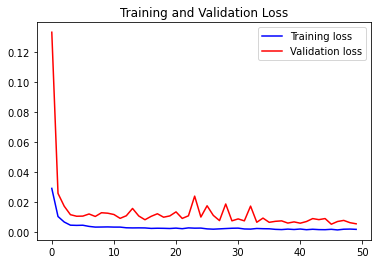

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [18]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['time'], axis = 1)
df.head()

,open,high,low,close
0,33786.54,34945.61,33316.73,34669.13
1,34669.12,35967.85,34357.15,35286.51
2,35288.13,35293.78,33125.55,33690.14
3,33690.15,35118.88,33532.00,34220.01
4,34220.02,35059.09,33777.77,33862.12


In [79]:
scaler_test = MinMaxScaler()
inputs = scaler_test.fit_transform(df)

In [21]:
scale0 = 1/scaler.scale_[0]
scale1 = 1/scaler.scale_[1]
scale2 = 1/scaler.scale_[2]
scale3 = 1/scaler.scale_[3]

In [80]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
        X_test.append(inputs[i-60:i])
        Y_test.append(inputs[i])
X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_test = Y_test
print(X_test.shape)
print(Y_test.shape)

(139, 60, 4)
(139, 4)


In [81]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 22ms/step - loss: 0.0120


0.011967766098678112

In [126]:
model.save("multivariate_lstm_4out.h5")

# Forecast

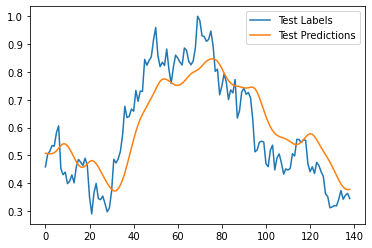

In [82]:
predictions_test = model.predict(X_test)
plt.figure()
plt.plot(Y_test[:,0], label="Test Labels")
plt.plot(predictions_test[:,0], label="Test Predictions")
plt.legend()

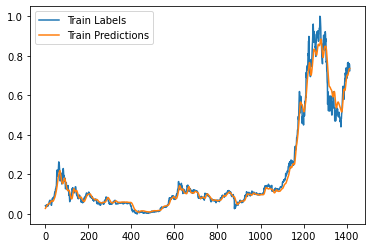

In [83]:
predictions_train = model.predict(X_train)
plt.figure()
plt.plot(Y_train[:,0], label="Train Labels")
plt.plot(predictions_train[:,0], label="Train Predictions")
plt.legend()

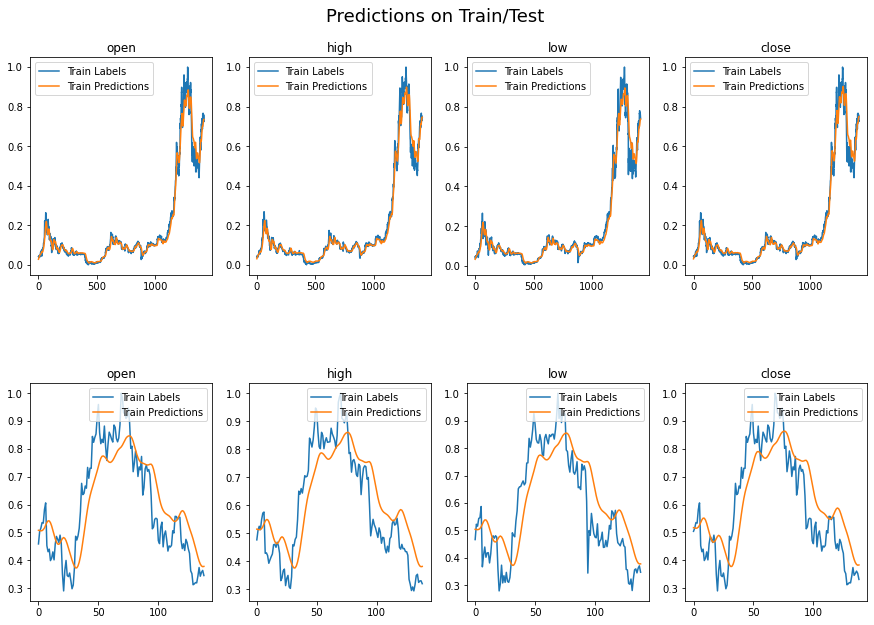

In [84]:
def train_test_plot(Y_train, Y_test, predictions_train, predictions_test):
    fig, axs = plt.subplots(2, 4, figsize=(15,10))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Predictions on Train/Test", fontsize=18, y=0.95)

    for i,ax in enumerate(axs[0].ravel()):
        ax.set_title(df.columns[i])
        ax.plot(Y_train[:,i], label="Train Labels")
        ax.plot(predictions_train[:,i], label="Train Predictions")
        ax.legend()

    for i,ax in enumerate(axs[1].ravel()):
        ax.set_title(df.columns[i])
        ax.plot(Y_test[:,i], label="Train Labels")
        ax.plot(predictions_test[:,i], label="Train Predictions")
        ax.legend()
        
train_test_plot(Y_train, Y_test, predictions_train, predictions_test)

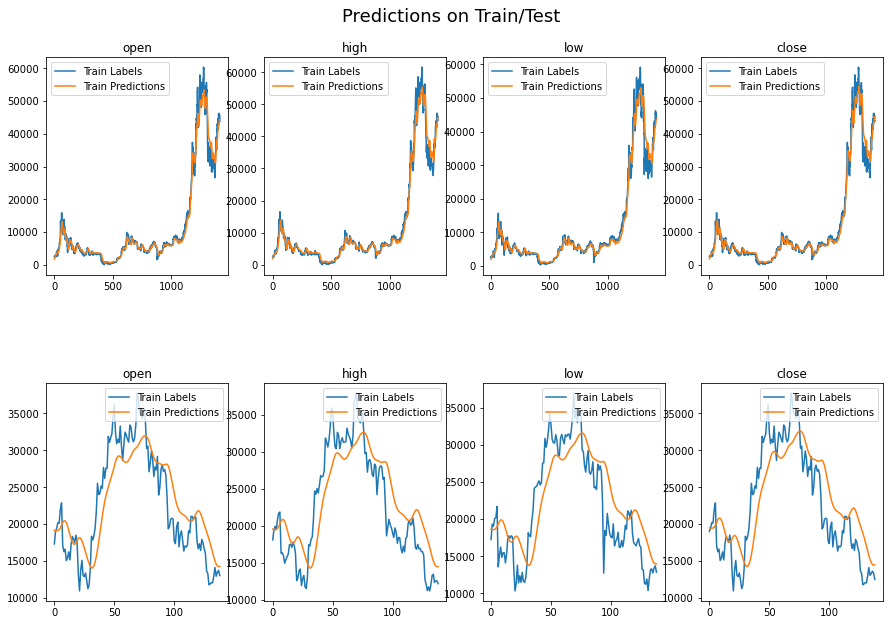

In [85]:
predictions_train_Unscaled = predictions_train/scaler.scale_
predictions_test_Unscaled = predictions_test/scaler_test.scale_

train_test_plot(Y_train/scaler.scale_, Y_test/scaler_test.scale_, predictions_train_Unscaled, predictions_test_Unscaled)

# MAPE

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [125]:
#from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = asser type(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / (y_true+1e-8)), axis=0) * 100

mape = mean_absolute_percentage_error(Y_train/scaler.scale_, predictions_train_Unscaled)
print("MAPE:")
mape

MAPE:


array([2.39062831e+01, 6.91215184e+09, 1.65786644e+01, 2.76698616e+01])

In [124]:
print("MAE: ")
print(mean_absolute_error(Y_train/scaler.scale_, predictions_train_Unscaled, multioutput='raw_values'))
print("RMSE: ")
print(np.sqrt(mean_squared_error(Y_train/scaler.scale_, predictions_train_Unscaled, multioutput='raw_values')))

MAE: 
[1151.58875248 1203.10776454 1213.97047729 1234.8973397 ]
RMSE: 
[1925.04639224 1964.13542375 2085.26396908 2055.43241595]


In [129]:
mape = mean_absolute_percentage_error(Y_test/scaler_test.scale_, predictions_test_Unscaled)
print("Test")
print("MAPE:")
print(mape)
print("MAE: ")
print(mean_absolute_error(Y_test/scaler_test.scale_, predictions_test_Unscaled, multioutput='raw_values'))
print("RMSE: ")
print(np.sqrt(mean_squared_error(Y_test/scaler_test.scale_, predictions_test_Unscaled, multioutput='raw_values')))

Test
MAPE:
[16.42894103 18.03854332 19.6272006  18.46648708]
MAE: 
[3270.16462004 3488.70191604 3582.44966152 3599.95374359]
RMSE: 
[3862.77172952 4093.34309897 4242.23189322 4229.92994587]
